Notes:
```
tf.keras.utils.plot_model(gan_model, to_file='msc-experiment1-ganmodel.png', show_shapes=True)
```

In [10]:
import numpy as np
import tensorflow as tf
import h5py

import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.signal import spectrogram, stft, istft

from sklearn.metrics import confusion_matrix

In [11]:
# Define the constants
FS = 66
NPERSEG = 127
SAMPLES = 4000
STFT_SIZE = 64
N_SAMPLES = 10000
KEYS_VALID = None
Y_VALID = None
X_VALID = None

In [12]:
def plot_seismograms(do, label, file_path=None):
    do = istft(do.transpose(2, 0, 1), fs=FS, nperseg=NPERSEG)[1]
    d0 = pd.DataFrame(data=do[0][:SAMPLES])
    d1 = pd.DataFrame(data=do[1][:SAMPLES])
    d2 = pd.DataFrame(data=do[2][:SAMPLES])

    fig = plt.figure(figsize=(8, 5), dpi=80)
    ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    ax2 = plt.subplot2grid((3, 1), (1, 0), colspan=1)
    ax3 = plt.subplot2grid((3, 1), (2, 0), colspan=1)

    plt.subplots_adjust(hspace=1, wspace=1)

    sns.lineplot(data=d0, ax=ax1, linewidth=1, legend=None)
    sns.lineplot(data=d1, ax=ax2, linewidth=1, legend=None)
    sns.lineplot(data=d2, ax=ax3, linewidth=1, legend=None)

    ax1.set_title("Vertical component waveform")
    ax1.set(xlabel="Samples", ylabel="Amplitude counts")
    ax1.locator_params(nbins=6, axis="y")

    ax2.set_title("North component waveform")
    ax2.set(xlabel="Samples", ylabel="Amplitude counts")
    ax2.locator_params(nbins=6, axis="y")

    ax3.set_title("East component waveform")
    ax3.set(xlabel="Samples", ylabel="Amplitude counts")
    ax3.locator_params(nbins=6, axis="y")

    plt.suptitle(label, fontsize=14)

    if file_path != None:
        plt.savefig(file_path)
        plt.close(fig)

In [16]:
def plot_all(do, label, file_path=None):
    do = istft(do.transpose(2, 0, 1), fs=FS, nperseg=NPERSEG)[1]
    d0 = pd.DataFrame(data=do[0][:SAMPLES])
    d1 = pd.DataFrame(data=do[1][:SAMPLES])
    d2 = pd.DataFrame(data=do[2][:SAMPLES])

    fig = plt.figure(figsize=(16, 10), dpi=80)
    ax1 = plt.subplot2grid((5, 6), (0, 0), colspan=3)
    ax2 = plt.subplot2grid((5, 6), (1, 0), colspan=3)
    ax3 = plt.subplot2grid((5, 6), (2, 0), colspan=3)
    ax4 = plt.subplot2grid((5, 6), (0, 3), colspan=3)
    ax5 = plt.subplot2grid((5, 6), (1, 3), colspan=3)
    ax6 = plt.subplot2grid((5, 6), (2, 3), colspan=3)
    ax7 = plt.subplot2grid((5, 6), (3, 0), colspan=2, rowspan=2)
    ax8 = plt.subplot2grid((5, 6), (3, 2), colspan=2, rowspan=2)
    ax9 = plt.subplot2grid((5, 6), (3, 4), colspan=2, rowspan=2)

    plt.subplots_adjust(hspace=1, wspace=1)

    sns.lineplot(data=d0, ax=ax1, linewidth=1, legend=None)
    sns.lineplot(data=d1, ax=ax2, linewidth=1, legend=None)
    sns.lineplot(data=d2, ax=ax3, linewidth=1, legend=None)

    ax1.set_title("Vertical component waveform")
    ax1.set(xlabel="Samples", ylabel="Amplitude counts")
    ax1.locator_params(nbins=6, axis="y")

    ax2.set_title("North component waveform")
    ax2.set(xlabel="Samples", ylabel="Amplitude counts")
    ax2.locator_params(nbins=6, axis="y")

    ax3.set_title("East component waveform")
    ax3.set(xlabel="Samples", ylabel="Amplitude counts")
    ax3.locator_params(nbins=6, axis="y")

    f_0, t_0, Sxx_0 = spectrogram(x=do[0], fs=FS)
    f_1, t_1, Sxx_1 = spectrogram(x=do[1], fs=FS)
    f_2, t_2, Sxx_2 = spectrogram(x=do[2], fs=FS)

    ax4.clear()
    ax4.set_title("Vertical component spectrogram")
    _ax4 = ax4.pcolormesh(t_0, f_0, Sxx_0, shading="gouraud")
    ax4.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax4, ax=ax4)

    ax5.clear()
    ax5.set_title("North component spectrogram")
    _ax5 = ax5.pcolormesh(t_1, f_1, Sxx_1, shading="gouraud")
    ax5.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax5, ax=ax5)

    ax6.clear()
    ax6.set_title("East component spectrogram")
    _ax6 = ax6.pcolormesh(t_2, f_2, Sxx_2, shading="gouraud")
    ax6.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax6, ax=ax6)

    f_sftt_0, t_sftt_0, Zxx_0 = stft(do[0], window="hanning", fs=FS, nperseg=NPERSEG)
    f_sftt_1, t_sftt_1, Zxx_1 = stft(do[1], window="hanning", fs=FS, nperseg=NPERSEG)
    f_sftt_2, t_sftt_2, Zxx_2 = stft(do[2], window="hanning", fs=FS, nperseg=NPERSEG)

    ticks = np.arange(STFT_SIZE)

    ax7.clear()
    ax7.set_title("Vertical component STFT")
    _ax7 = ax7.pcolormesh(ticks, ticks, np.abs(Zxx_0), shading="auto")
    fig.colorbar(_ax7, ax=ax7)

    ax8.clear()
    ax8.set_title("North component STFT")
    _ax8 = ax8.pcolormesh(ticks, ticks, np.abs(Zxx_1), shading="auto")
    fig.colorbar(_ax8, ax=ax8)

    ax9.clear()
    ax9.set_title("East component STFT")
    _ax9 = ax9.pcolormesh(ticks, ticks, np.abs(Zxx_2), shading="auto")
    fig.colorbar(_ax9, ax=ax9)

    plt.suptitle(label, fontsize=14)

    if file_path != None:
        plt.savefig(file_path)
        plt.close(fig)

In [14]:
with h5py.File("data/stead_test_stft_64.hdf5", "r") as f:
    KEYS_VALID = f["keys"][:N_SAMPLES]
    Y_VALID = f["labels"][:N_SAMPLES]
    X_VALID = f["data"][:N_SAMPLES]

In [7]:
disc = tf.keras.models.load_model("out2/desc-10")
pred = disc.predict(X_VALID)

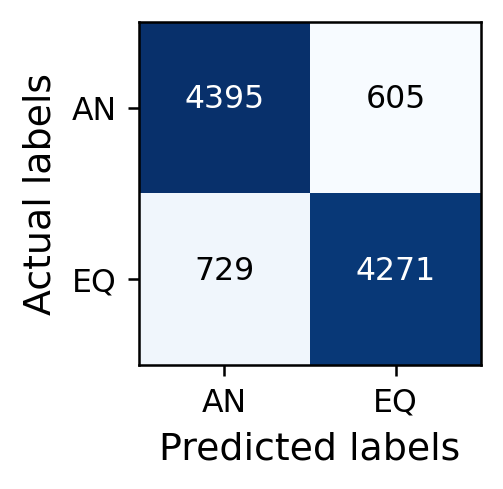

In [8]:
conf_matrix = confusion_matrix(y_true=Y_VALID, y_pred=np.round(abs(pred)))
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

plt.figure(figsize=(2, 2), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual labels', fontsize=12)
plt.xlabel('Predicted labels', fontsize=12)

tick_marks = np.arange(2)
plt.yticks(tick_marks, ["AN", "EQ"])
plt.xticks(tick_marks, ["AN", "EQ"])

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
    color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

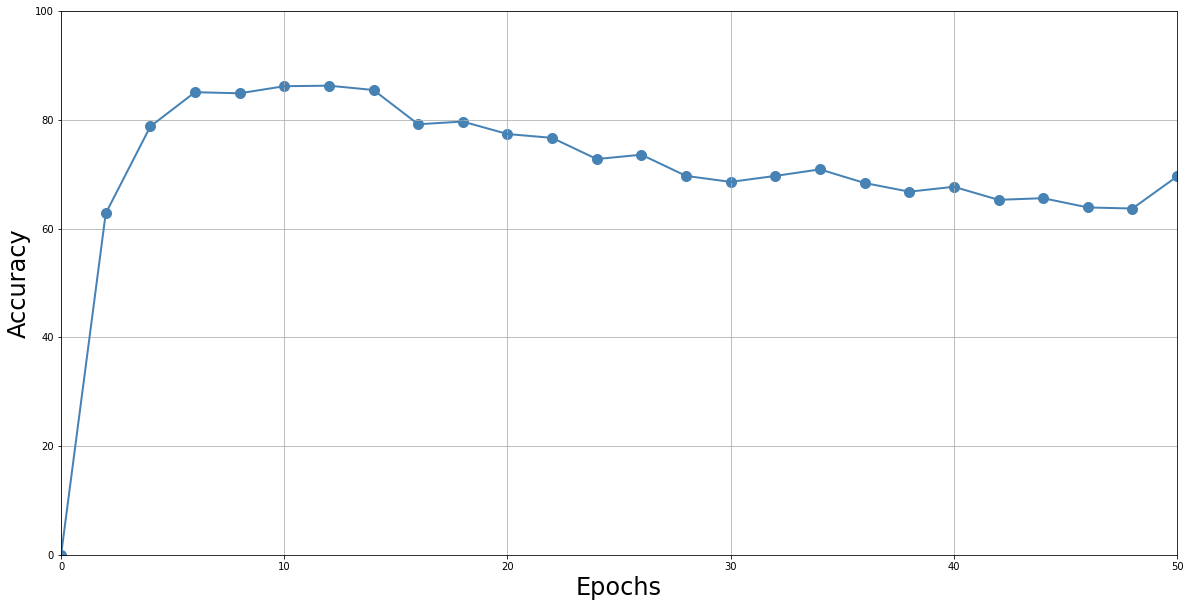

In [10]:
plt.figure(figsize=[20, 10])

plt.xlim([0, 50])
plt.ylim([0, 100])

# plt.title('Discriminator accuracy', fontsize=17)
plt.xlabel('Epochs', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)

# 2) X Axis Data: create a list from 0 to n + 1
iteration_list = [x for x in range(51) if x%2==0]
vals = [0, 62.8, 78.8, 85.1, 84.9, 86.2, 86.3, 85.5, 79.2, 79.7, 77.4, 76.7, 72.8, 73.6, 69.7, 68.6, 69.7, 70.9, 68.4, 66.8, 67.7, 65.3, 65.6, 63.9, 63.7, 69.6]

# Plotting low learning rate
plt.plot(iteration_list, np.array(vals), color='steelblue', linewidth=2)
plt.scatter(iteration_list, np.array(vals), color="steelblue", s=100)

# # Plotting mid learning rate
# plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
# plt.scatter(iteration_list, g(mid_values), color="steelblue", s=80)

# # Plotting high learning rate
# plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
# plt.scatter(iteration_list, g(high_values), color="hotpink", s=80)

# # Plotting insane learning rate
# plt.plot(iteration_list, g(insane_values), color='red', linewidth=5)
# plt.scatter(iteration_list, g(insane_values), color="red", s=80)
plt.grid()

In [316]:
for idx in range(200,300):
    print(idx)
    print(f"Label: {KEYS_VALID[idx]}")
    print(f"Predicted accuracy: {pred[idx]}")
    print(f"Real class: {Y_VALID[idx]}")
    print("-----------------------------------------------------")

200
Label: b'CMAS.CA_20180115100818_NO'
Predicted accuracy: [0.2873218]
Real class: 0
-----------------------------------------------------
201
Label: b'BALB.KO_20180115121500_NO'
Predicted accuracy: [0.04517142]
Real class: 0
-----------------------------------------------------
202
Label: b'SEST.IV_20060505195032_EV'
Predicted accuracy: [0.3468269]
Real class: 1
-----------------------------------------------------
203
Label: b'EFP.HP_20080618015856_EV'
Predicted accuracy: [1.]
Real class: 1
-----------------------------------------------------
204
Label: b'CMAS.CA_20180116074736_NO'
Predicted accuracy: [0.32386816]
Real class: 0
-----------------------------------------------------
205
Label: b'DSF.HP_20090629032823_EV'
Predicted accuracy: [0.4905349]
Real class: 1
-----------------------------------------------------
206
Label: b'MAKR.HA_20090422075723_EV'
Predicted accuracy: [0.5232416]
Real class: 1
-----------------------------------------------------
207
Label: b'WLF1.GB_201801

Label: b'GEMT.KO_20080224145722_EV'
Real class: 1


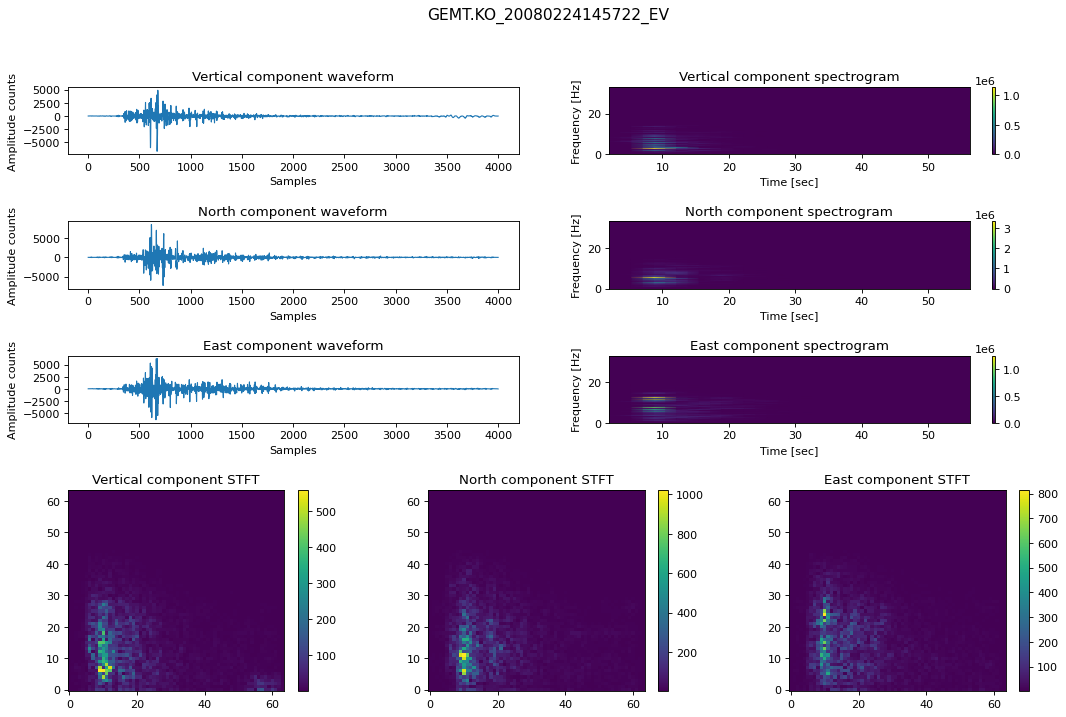

In [23]:
idx = 500
print(f"Label: {KEYS_VALID[idx]}")
# print(f"Predicted accuracy: {pred[idx]}")
print(f"Real class: {Y_VALID[idx]}")
plot_all(X_VALID[idx], KEYS_VALID[idx].decode("utf-8"))